# cifar10の分類 deep-lernign (not cnn)

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.datasets import cifar10
from  keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#read_data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:

m_train, m_test = x_train.shape[0], x_test.shape[0]
# reshape to vector
x_train, x_test = x_train.reshape(m_train, -1), x_test.reshape(m_test, -1)


In [5]:
#s=True)
# x_train = x_train / np.linalg.norm(x_train, ord=2, axis=1, keepdims=True)
# x_test = x_test / np.linalg.norm(x_test, ord=2, axis=1, keepdim


In [6]:
#one hot label
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [7]:
x_train.shape

(50000, 3072)

# モデル

In [8]:
model = Sequential()
model.add(Dense(768, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(192, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [9]:
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=64, epochs=15)

Epoch 1/15
50000/50000 [==============================] - 67s 1ms/step - loss: 1.8998 - acc: 0.3201
Epoch 2/15
50000/50000 [==============================] - 65s 1ms/step - loss: 1.6727 - acc: 0.4006
Epoch 3/15
50000/50000 [==============================] - 65s 1ms/step - loss: 1.5873 - acc: 0.4329
Epoch 4/15
50000/50000 [==============================] - 63s 1ms/step - loss: 1.5327 - acc: 0.4513
Epoch 5/15
50000/50000 [==============================] - 63s 1ms/step - loss: 1.4879 - acc: 0.4687
Epoch 6/15
50000/50000 [==============================] - 64s 1ms/step - loss: 1.4584 - acc: 0.4782
Epoch 7/15
50000/50000 [==============================] - 63s 1ms/step - loss: 1.4309 - acc: 0.4903
Epoch 8/15
50000/50000 [==============================] - 67s 1ms/step - loss: 1.4041 - acc: 0.4986
Epoch 9/15
50000/50000 [==============================] - 65s 1ms/step - loss: 1.3797 - acc: 0.5068
Epoch 10/15
50000/50000 [==============================] - 65s 1ms/step - loss: 1.3528 - acc: 0.5156

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4089443790435792
Test accuracy: 0.5064


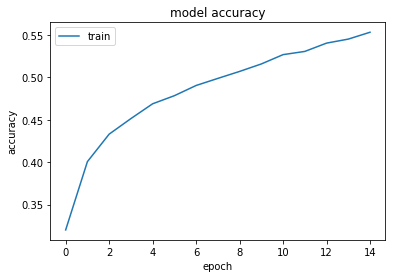

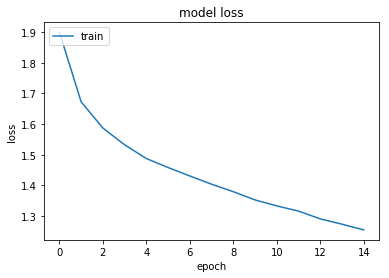

In [11]:
import sklearn.metrics as metrics
#Accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
#confusion matrix
y_test.argmax(axis=1)

array([3, 8, 8, ..., 5, 1, 7])

In [13]:
pred = model.predict_classes(x_test)

In [14]:
metrics.confusion_matrix(y_test.argmax(axis=1),pred)

array([[649,  30,  41,   9,  26,   8,  16,  26, 134,  61],
       [ 48, 545,  12,   9,  12,  19,  12,  21,  74, 248],
       [128,  20, 365,  46, 135,  77, 105,  70,  30,  24],
       [ 73,  19,  98, 250,  77, 196, 122,  56,  46,  63],
       [ 73,   9, 170,  25, 444,  46,  99,  89,  33,  12],
       [ 48,  13, 104, 140,  88, 379,  77,  68,  44,  39],
       [ 26,  17,  92,  34, 140,  51, 578,  19,  18,  25],
       [ 63,  15,  64,  43, 102,  68,  25, 539,  21,  60],
       [116,  58,  12,  11,  27,   8,   3,  15, 682,  68],
       [ 45, 136,   8,   7,   8,  18,  25,  44,  76, 633]])